### PROJETOS DE COMPONENTES MECÃNICOS ###

PROJETO DE CORREIAS

Na aula 2 vimos que existem alguns parâmetros essenciais para se projetar um sistema de correias. Esses parâmetros podem ser obtidos por meio de cálculos como mostrado na aula 2, ou através do uso de softwares.
Objetivo Geral: Esta atividade prática tem por objetivo geral permitir que o aluno obtenha os parâmetros de projeto de uma correia através de um “software”. Além de extrair os parâmetros de projeto do software, o aluno deverá realizar os cálculos conforme os modelos apresentados pelo professor Julio Almeida na aula 2.

a partir do codigo abaixo, pode ser resolvido facilmente o projeto de componentes apenas inserindo o RU de qualquer aluno.

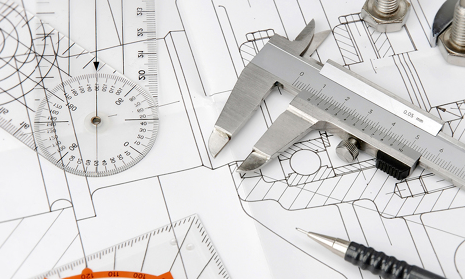

In [4]:
import sympy
import pandas as pd
from math import asin
import math 

In [5]:
# Criando Função para converter a matricula passada em string 

def Convert(string):
    list1=[]
    list1[:0]=string
    return list1

# Inserindo o RU do Aluno
ru_list = input("insira o seu ru!")
print(Convert(ru_list))

insira o seu ru!2611965
['2', '6', '1', '1', '9', '6', '5']


In [6]:
# Criando a regra para pegar os 4 ultimos digitos do aluno e somar
quatro_ultimos_digitos_ru = int(ru_list[3]) + int(ru_list[4]) + int(ru_list[5]) + int(ru_list[6])

# Criando a regra para pegar os 3 ultimos digitos do aluno e somar
tres_ultimos_digitos_ru = int(ru_list[4]) + int(ru_list[5]) + int(ru_list[6])

# Criando a regra para pegar os 2 ultimos digitos do aluno e somar
dois_ultimos_digitos_ru = int(ru_list[5]) + int(ru_list[6])

In [7]:
### campo de calculo ###
Potencia_Transmitida_kW = float(quatro_ultimos_digitos_ru) * 15
Rotacao_rpm = float(quatro_ultimos_digitos_ru) * 100
Diametro_da_polia_menor_mm =  float(tres_ultimos_digitos_ru) + 50
Diametro_da_polia_maior_mm = float(tres_ultimos_digitos_ru) + 80
Distancia_entre_centros_mm =  float(dois_ultimos_digitos_ru) + 100
angulo_do_sulco_da_polia_graus =  float(40)
Coeficiente_de_friccao_dividida_por_atrito =  float(0.3)

In [8]:
# inicializando uma lista com listas
data = [['Potência transmitida(P)', Potencia_Transmitida_kW,'kW'],
        ['Rotação do motor(n)', Rotacao_rpm,'rpm'],
        ['Diâmetro da polia motora(d)', Diametro_da_polia_menor_mm,'mm'],
        ['Diâmetro da polia movida(D)', Diametro_da_polia_maior_mm,'mm'], 
        ['Distância entre centro(a)', Distancia_entre_centros_mm,'mm'],
        ['Ângulo de sulco na polia(β)', angulo_do_sulco_da_polia_graus,'graus'],
        ['Coeficiente de fricção(μ)', Coeficiente_de_friccao_dividida_por_atrito,'-']]

# Criando um dataframe do pandas
df_tabela_resultado_dados = pd.DataFrame(data, columns=['DADOS DE ENTRADA', 'RESULTADO','MEDIDA'])

# mostrando o dataframe
df_tabela_resultado_dados

,DADOS DE ENTRADA,RESULTADO,MEDIDA
0,Potência transmitida(P),315.0,kW
1,Rotação do motor(n),2100.0,rpm
2,Diâmetro da polia motora(d),70.0,mm
3,Diâmetro da polia movida(D),100.0,mm
4,Distância entre centro(a),111.0,mm
5,Ângulo de sulco na polia(β),40.0,graus
6,Coeficiente de fricção(μ),0.3,-


In [9]:
P = Potencia_Transmitida_kW
n = Rotacao_rpm
d = Diametro_da_polia_menor_mm
D = Diametro_da_polia_maior_mm
a = Distancia_entre_centros_mm
β = angulo_do_sulco_da_polia_graus
μ = Coeficiente_de_friccao_dividida_por_atrito
pi = 3.14159265358979

In [10]:
# criando arc_sen
x = (D-d) / (2*a)
arc_sen = (asin(x))

# criando o sen
x = β / 2
sin_coe = math.sin(math.radians(x))

In [11]:
### campo de calculo ###
Relacao_de_transmissao_i = d / D
Relacao_de_transmissao_i = round(Relacao_de_transmissao_i,2)
Comprimento_da_correia_L = ((2*a)+(1.57*(D+d))+(D-d)**2/(4*a)) / 1000 # Dividido por 1000 pois temos que passsar de mm para M
Comprimento_da_correia_L = round(Comprimento_da_correia_L,2)          
Menor_angulo_da_correia_α1 = (pi - (2 * arc_sen)) * (180 / pi)
Menor_angulo_da_correia_α1 = round(Menor_angulo_da_correia_α1,2) # o resultado final deve ser em Nm
Torque_de_acionamento_T1 = (P*(10**3))/((n*(2*pi)) / 60)  

In [12]:
i = Relacao_de_transmissao_i
L = Comprimento_da_correia_L
α1 = Menor_angulo_da_correia_α1
T1 = Torque_de_acionamento_T1

In [13]:
### campo de calculo ###
Torque_na_polia_movida_T2 = T1 / i
Força_tangencial_Ft= (2*T1) /(d*10**-3)
Coeficiente_de_friccao_efetiva_f = μ / sin_coe

In [14]:
T2 = Torque_na_polia_movida_T2
Ft = Força_tangencial_Ft
f = Coeficiente_de_friccao_efetiva_f

In [15]:
# criando um exp_razao de forcas como exponencial
x = (f * α1 * pi) / 180
exp_raz = math.exp(x)

In [16]:
### campo de calculo ###
Razao_de_forcas_F1_F2 = exp_raz

In [17]:
F1_F2 = Razao_de_forcas_F1_F2

In [18]:
### campo de calculo ###
Força_no_lado_tenso_F1 = Ft / (1 - (1 / F1_F2 ))

In [19]:
F1 = Força_no_lado_tenso_F1

In [20]:
### campo de calculo ###
Força_no_lado_bambo_F2 = F1 - Ft

In [21]:
F2 = Força_no_lado_bambo_F2

In [22]:
# inicializando uma lista com listas
data = [['Relação de transmissão(i)', round(i,2),'-'],
        ['Comprimento da correia(L)', round(L,2),'m'],
        ['Menor ângulo da correia(α1)', round(α1,2),'graus'],
        ['Torque de acionamento(T1)', round(T1,2),'Nm'], 
        ['Torque na polia movida(T2)', round(T2,2),'Nm'],
        ['Força tangencial(Ft)', round(Ft,2),'N'],
        ['Coeficiente de fricção efetiva(f)', round(f,2),'-'],
        ['Razão de forças(F1_F2)', round(F1_F2,2),'-'],
        ['Força no lado tenso(F1)', round(F1,2),'N'],
        ['Força no lado bambo(F2)', round(F2,2),'N']]

# Criando um dataframe do pandas
df_tabela_resultado_final = pd.DataFrame(data, columns=['DADOS DE ENTRADA', 'RESULTADO','MEDIDA'])

# mostrando o dataframe
df_tabela_resultado_final

,DADOS DE ENTRADA,RESULTADO,MEDIDA
0,Relação de transmissão(i),0.70,-
1,Comprimento da correia(L),0.49,m
2,Menor ângulo da correia(α1),164.47,graus
3,Torque de acionamento(T1),1432.39,Nm
4,Torque na polia movida(T2),2046.28,Nm
5,Força tangencial(Ft),40925.56,N
6,Coeficiente de fricção efetiva(f),0.88,-
7,Razão de forças(F1_F2),12.40,-
8,Força no lado tenso(F1),44514.83,N
9,Força no lado bambo(F2),3589.28,N


/content/drive/MyDrive/Colab Notebooks/imagem_projeto/proj_final_com_calculos_na_imagem.PNG

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
#importando lib para gerar imagem
from PIL import Image 
from PIL import ImageDraw
from PIL import ImageFont

#definindo local da imagem e imagem
img = Image.open('/content/drive/MyDrive/Colab Notebooks/imagem_projeto/proj.PNG') 
I1 = ImageDraw.Draw(img)

# usando a fonte para inserir na nossa imagem
font = ImageFont.truetype("/content/drive/MyDrive/Colab Notebooks/imagem_projeto/arial.ttf", 15)
I1.text((367, 42), str(Distancia_entre_centros_mm), font=font, fill=(260, 0, 0))
I1.text((149, 196), str(Diametro_da_polia_menor_mm)+str(" mm"), font=font, fill=(260, 0, 0))
I1.text((567, 196), str(Diametro_da_polia_maior_mm)+str(" mm"), font=font, fill=(260, 0, 0))
I1.text((210, 325), str(angulo_do_sulco_da_polia_graus)+"º", font=font, fill=(260, 0, 0))
I1.text((353, 545), str(round(T1,2)), font=font, fill=(260, 0, 0))
I1.text((727, 360), str(round(F1,2))+str(" N"), font=font, fill=(260, 0, 0))
I1.text((727, 575), str(round(F2,2))+str(" N"), font=font, fill=(260, 0, 0))
img.show() 
img.save("/content/drive/MyDrive/Colab Notebooks/imagem_projeto/proj_final_com_calculos_na_imagem.PNG")

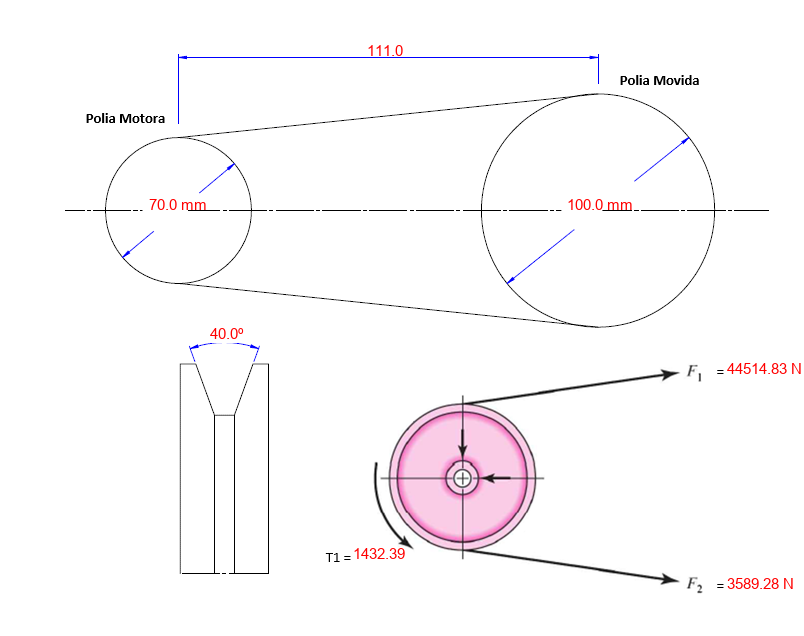

In [55]:
#importando lib para ler imagem gerada
import cv2
from google.colab.patches import cv2_imshow

#definindo variavel de imagem gerada
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagem_projeto/proj_final_com_calculos_na_imagem.PNG')

#abrindo imagem gerada
cv2_imshow(imagem)